In [17]:
import pandas as pd

In [18]:
folder = "conv_300_0127_RR"
data = "server.log_instance.csv"
df = pd.read_csv(folder + "/" + data)

print(df.head())

      timestamp                       instance_id  step_id  gpu_cache_usage  \
0  1.737951e+09  5e66ca14da0a4367abf34b5ece4a2aae        0         0.000000   
1  1.737951e+09  2fa1003131e047ad82752279fda0594b        0         0.000000   
2  1.737951e+09  d6432c54109f4244a016ed1c7aa28843        0         0.000000   
3  1.737951e+09  0d9584a336e84bc091dd181b42ed606f        0         0.000000   
4  1.737951e+09  0d9584a336e84bc091dd181b42ed606f    12489         0.002616   

   num_available_gpu_blocks  instance_load  max_tot_tokens  \
0                      9462           -inf               0   
1                      9462           -inf               0   
2                      9462           -inf               0   
3                      9462           -inf               0   
4                      9437        -9437.0               0   

   num_running_requests  num_waiting_requests  num_killed_requests  \
0                     0                     0                    0   
1           

In [19]:
import matplotlib.pyplot as plt

In [20]:
df["timestamp"] = pd.to_datetime(df["timestamp"], unit="s", errors="coerce")

df["normalized_time"] = df.groupby("instance_id")["timestamp"].transform(
    lambda x: (x - x.min()).dt.total_seconds()  # 转换为从0开始的秒数
)

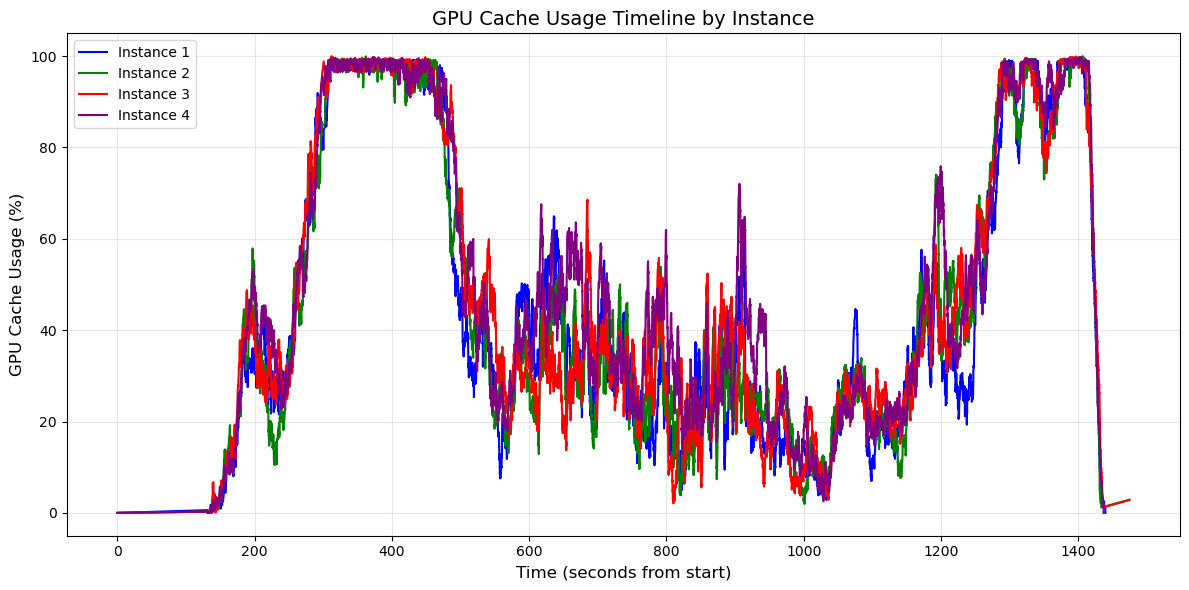

In [21]:
plt.figure(figsize=(12, 6))

# 4. 为每个instance绘制折线
instances = df["instance_id"].unique()
id_mapping = {id: i+1 for i, id in enumerate(instances)}
df["instance_id_mapped"] = df["instance_id"].map(id_mapping)

colors = ["blue", "green", "red", "purple"]
for instance, color in zip(range(1,len(instances) + 1), colors):
    instance_data = df[df["instance_id_mapped"] == instance]
    plt.plot(
        instance_data["normalized_time"],
        instance_data["gpu_cache_usage"] * 100,
        label=f"Instance {instance}",
        color=color,
        linewidth=1.5
    )

# 5. 添加图表元素
plt.title("GPU Cache Usage Timeline by Instance", fontsize=14)
plt.xlabel("Time (seconds from start)", fontsize=12)
plt.ylabel("GPU Cache Usage (%)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(loc="best", frameon=True)

# 6. 优化显示
plt.tight_layout()

# save as pdf
plt.savefig(folder + "/gpu_cache_usage_timeline.pdf", format="pdf")
plt.show()


In [22]:
import numpy as np

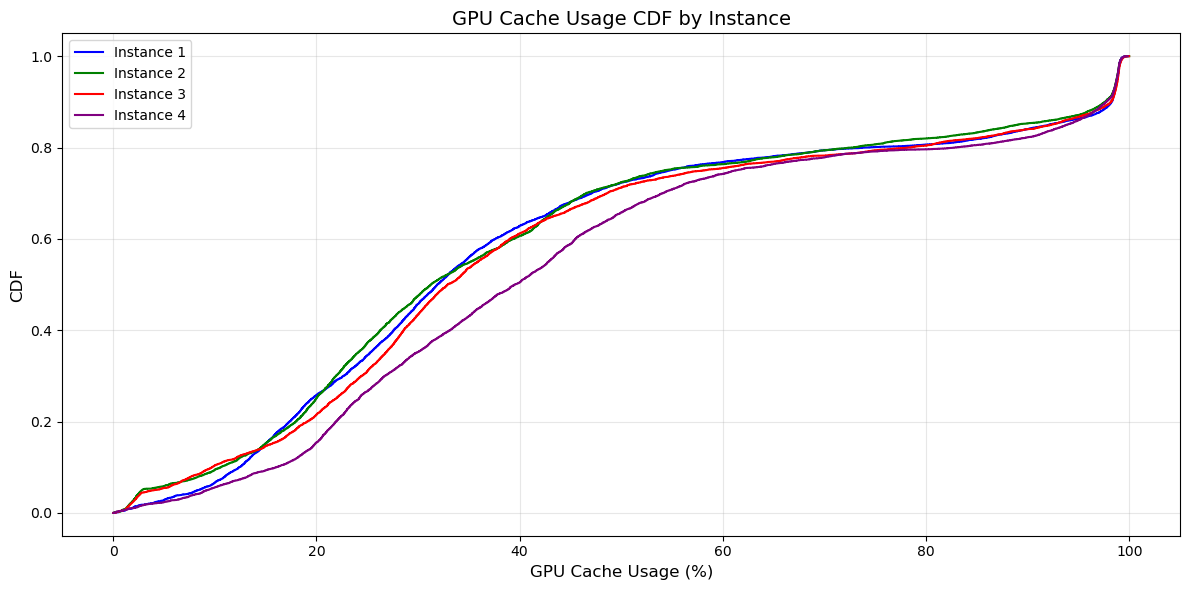

In [23]:
plt.figure(figsize=(12, 6))

# 4. 为每个instance绘制折线
instances = df["instance_id"].unique()
id_mapping = {id: i+1 for i, id in enumerate(instances)}
df["instance_id_mapped"] = df["instance_id"].map(id_mapping)

colors = ["blue", "green", "red", "purple"]
for instance, color in zip(range(1,len(instances) + 1), colors):
    instance_data = df[df["instance_id_mapped"] == instance]
    data = instance_data["gpu_cache_usage"] * 100
    sorted_data = np.sort(data)
    cdf = np.linspace(0, 1, len(sorted_data))
    plt.step(sorted_data, cdf, label=f"Instance {instance}", color=color, linewidth=1.5)
    

# 5. 添加图表元素
plt.title("GPU Cache Usage CDF by Instance", fontsize=14)
plt.xlabel("GPU Cache Usage (%)", fontsize=12)
plt.ylabel("CDF", fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(loc="best", frameon=True)

# 6. 优化显示
plt.tight_layout()

# 7. 保存或显示图像
plt.savefig(folder + "/gpu_cache_usage_cdf.pdf", format="pdf")
plt.show()


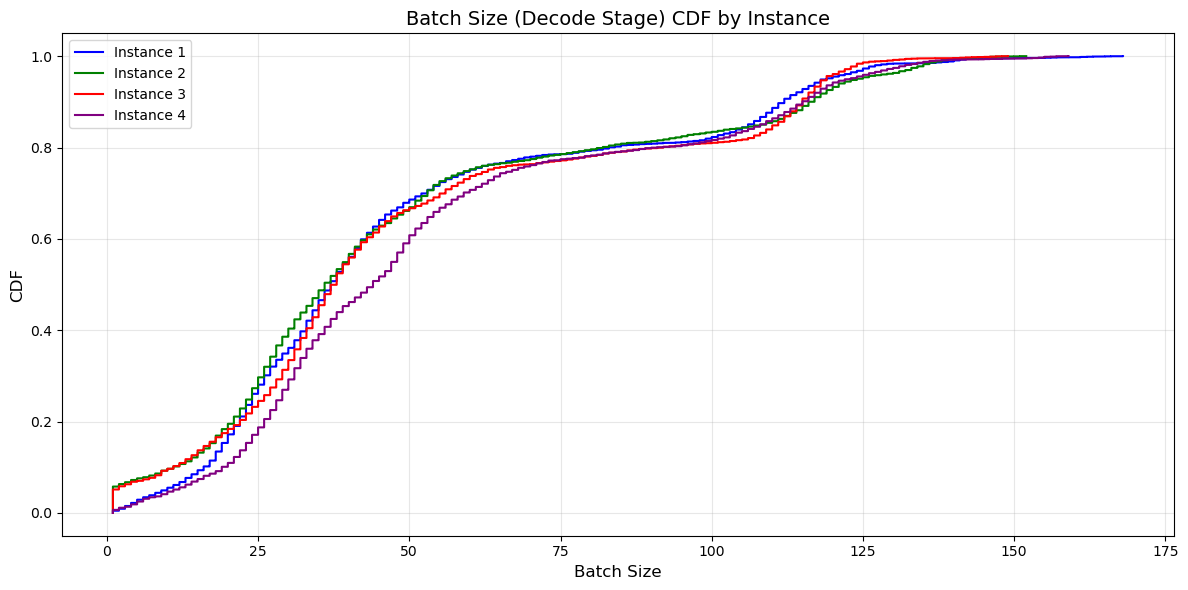

In [24]:
plt.figure(figsize=(12, 6))

# 4. 为每个instance绘制折线
instances = df["instance_id"].unique()
id_mapping = {id: i+1 for i, id in enumerate(instances)}
df["instance_id_mapped"] = df["instance_id"].map(id_mapping)

colors = ["blue", "green", "red", "purple"]
for instance, color in zip(range(1,len(instances) + 1), colors):
    instance_data = df[df["instance_id_mapped"] == instance]
    instance_data = instance_data[instance_data['inference_type'] == 'decode']
    data = instance_data["bs"]
    sorted_data = np.sort(data)
    cdf = np.linspace(0, 1, len(sorted_data))
    plt.step(sorted_data, cdf, label=f"Instance {instance}", color=color, linewidth=1.5)
    

# 5. 添加图表元素
plt.title("Batch Size (Decode Stage) CDF by Instance", fontsize=14)
plt.xlabel("Batch Size", fontsize=12)
plt.ylabel("CDF", fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(loc="best", frameon=True)

# 6. 优化显示
plt.tight_layout()
plt.savefig(folder + "/batch_size_cdf_decode.pdf", format="pdf")
plt.show()


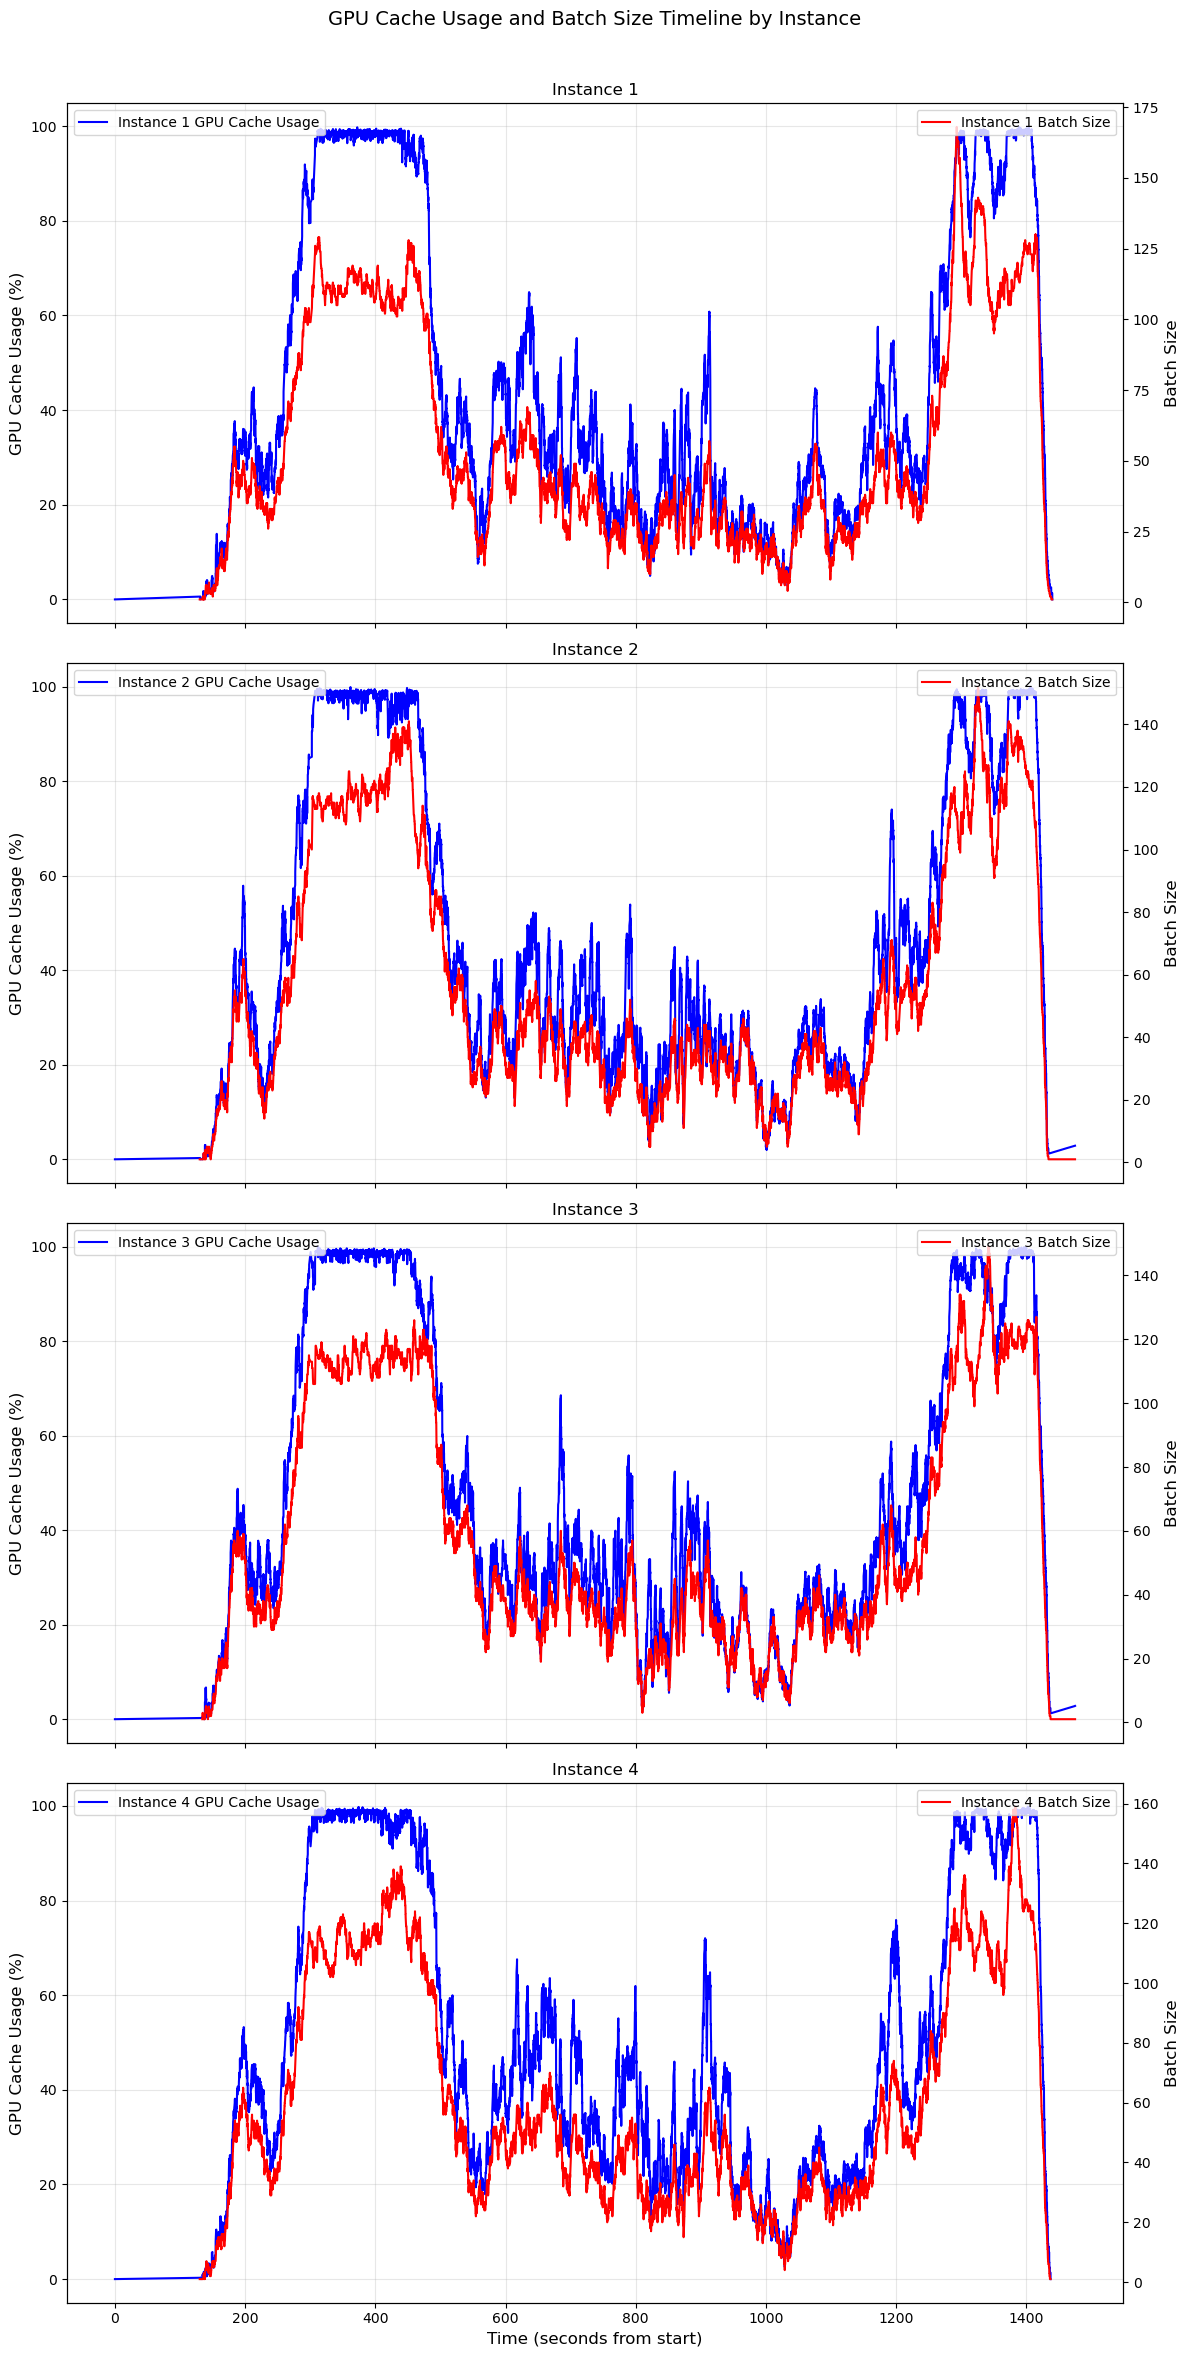

In [25]:
# 获取唯一的 instance_id 并创建映射
instances = df["instance_id"].unique()
id_mapping = {id: i+1 for i, id in enumerate(instances)}
df["instance_id_mapped"] = df["instance_id"].map(id_mapping)

# 创建子图
fig, axes = plt.subplots(len(instances), 1, figsize=(12, 6 * len(instances)), sharex=True)

if len(instances) == 1:
    axes = [axes]  # 确保 axes 是可迭代的

colors = ["blue", "green", "red", "purple"] * (len(instances) // 4 + 1)  # 确保颜色足够

for ax, (instance, color) in zip(axes, zip(range(1, len(instances) + 1), colors)):
    instance_data = df[df["instance_id_mapped"] == instance]
    
    # 绘制 GPU Cache 使用率
    ax.plot(
        instance_data["normalized_time"],
        instance_data["gpu_cache_usage"] * 100,
        label=f"Instance {instance} GPU Cache Usage",
        color="blue",
        linewidth=1.5
    )
    
    # 创建右侧 y 轴用于 Batch Size
    ax_right = ax.twinx()
    ax_right.set_ylabel("Batch Size", fontsize=12)
    
    # 绘制 Batch Size
    decoding_data = instance_data[instance_data['inference_type'] == 'decode']
    ax_right.plot(
        decoding_data["normalized_time"],
        decoding_data["bs"],
        label=f"Instance {instance} Batch Size",
        color="red",
        linewidth=1.5
    )
    
    ax.set_ylabel("GPU Cache Usage (%)", fontsize=12)
    ax.set_title(f"Instance {instance}")
    ax.grid(True, alpha=0.3)
    ax.legend(loc="upper left", frameon=True)
    ax_right.legend(loc="upper right", frameon=True)

# 共享 x 轴
axes[-1].set_xlabel("Time (seconds from start)", fontsize=12)
plt.suptitle("GPU Cache Usage and Batch Size Timeline by Instance", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.97])

# 保存 PDF
plt.savefig(folder + "/gpu_cache_usage_with_batch_size_timeline.pdf", format="pdf")
plt.show()
